In [1]:
import json
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
filename1 = './CEA-2d29f9/CEA-2d29f9'
filename2 = './GSPACEAPE-08bc2b/GSPACEAPE-08bc2b'

In [3]:
df = pd.read_csv(filename1+'_nfts.csv')
df = pd.concat([pd.read_csv(filename2+'_nfts.csv'), df])

In [4]:
with open(filename1+'_nfts.json') as f:
    data = json.load(f)
with open(filename2+'_nfts.json') as f:
    data = {**data, **json.load(f)}

In [5]:
with open(filename1+'_transactions.json') as f:
    transactions = json.load(f)
with open(filename2+'_transactions.json') as f:
    transactions = {**transactions, **json.load(f)}

In [6]:
talents = ['Overachiever', 'Hodler', 'Grounded', 'Stonewall', 'Adrenaline Rush',
    'Overshield', 'Black Widow', 'Galvanized', 'Nano Meds', 'Resilience',
    'Cold Blooded', 'Perseverance', 'Escape Artist', 'Scavenger',
    'Cool Moves', 'Brawler', 'Automatic Weapons Proficiency',
    'Scatter Weapons Proficiency', 'Precision Weapons Proficiency',
    'Explosive Weapons Proficiency', 'Elemental Weapons Proficiency']
traits = ['Species', 'Rarity Class', 'Head', 'Face', 'Skin', 'Eyes', 'Mouth',
    'Earrings', 'Headgear', 'Body', 'Legs', 'LegAccessories', 'Background',
    'Perk 1', 'Perk 2']
species = ['Genesis Space Ape', 'Genesis Cantina Elrond Ape']
def remove_sublist(l, s):
    return [x for x in l if x not in s]
other = remove_sublist(remove_sublist(list(df.columns), talents), traits)

In [7]:
def print_transaction(data, c=0):
    if isinstance(data, dict):
        for k, v in data.items():
            if isinstance(v, dict):
                print('\t'*c, k, type(v))
                print_transaction(v, c+1)
            else:
                print('\t'*c, k, type(v), v)
    elif isinstance(data, list):
        for i in data:
            print_transaction(i, c+1)

In [8]:
df['transactionCount'] = df['identifier'].apply(lambda x: transactions[x]['count'])

In [9]:
def barh(df, title):
    dshape=len(df)
    pixelsize = 0.5
    figsize=np.array(dshape)*pixelsize
    plt.figure(figsize=(5.5,min(figsize, 15)))
    df.sort_values().plot.barh(width=0.5)
    plt.xlabel('Count')
    plt.title(title)
    plt.show()

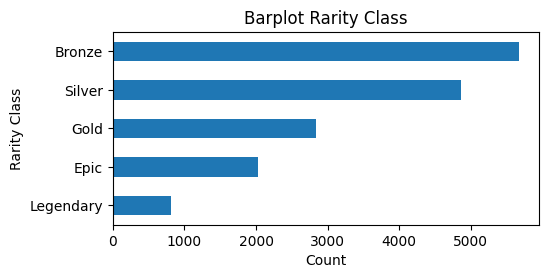

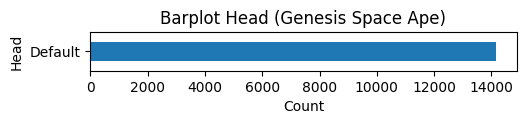

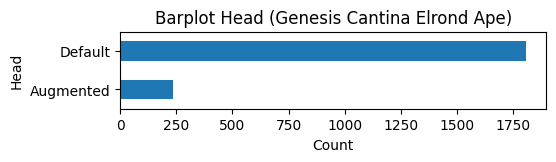

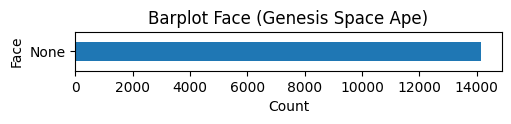

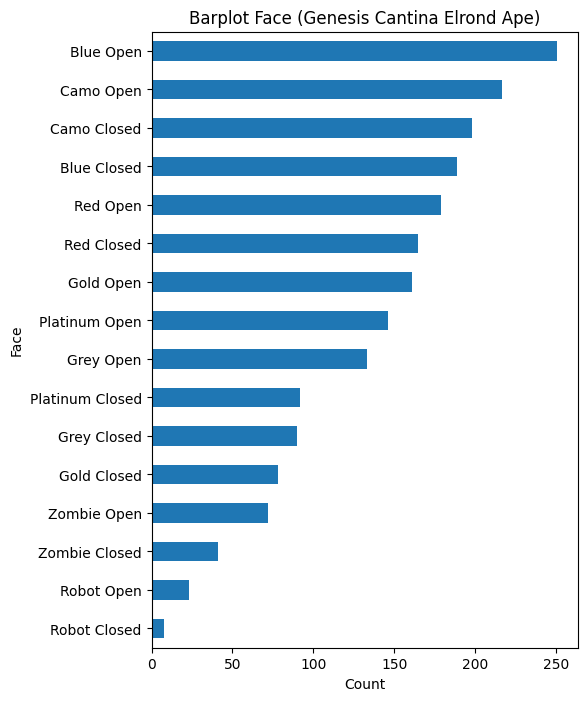

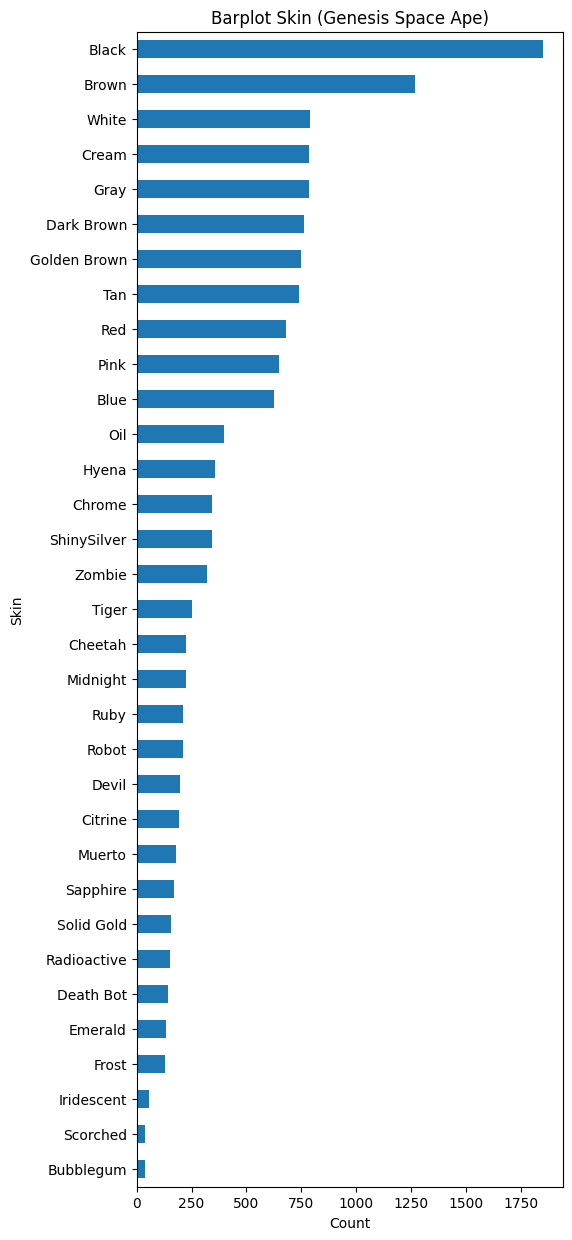

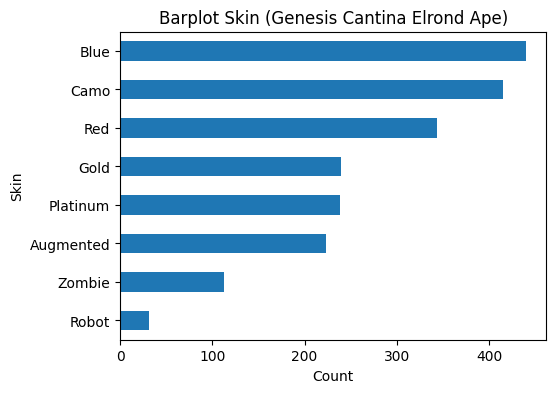

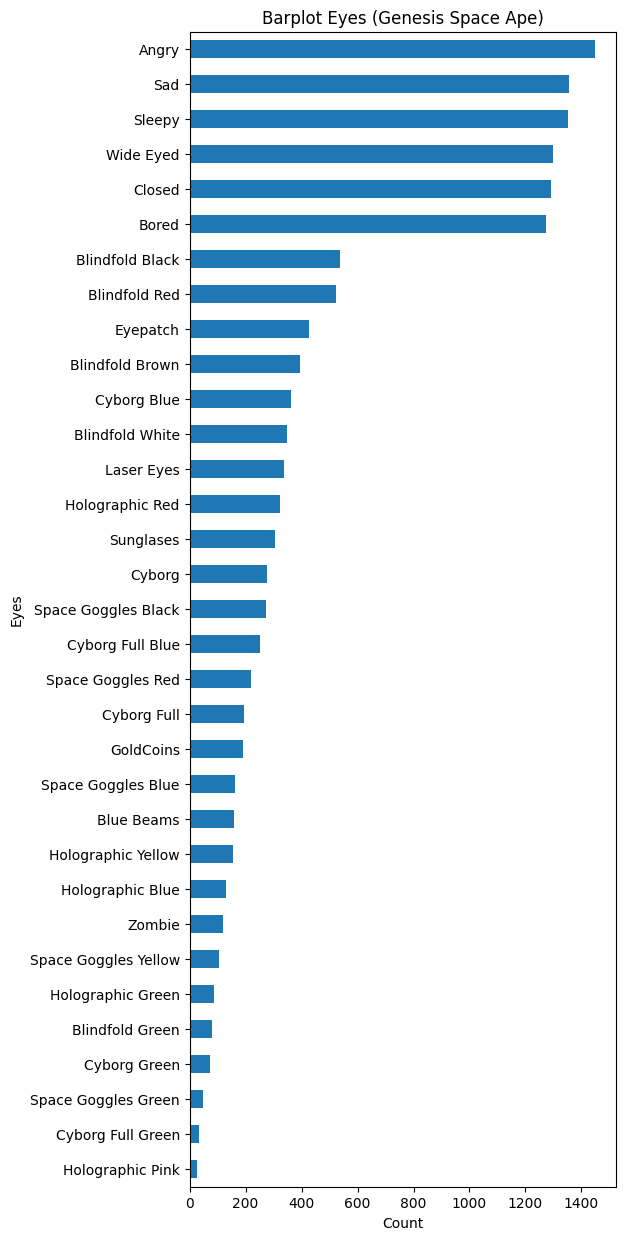

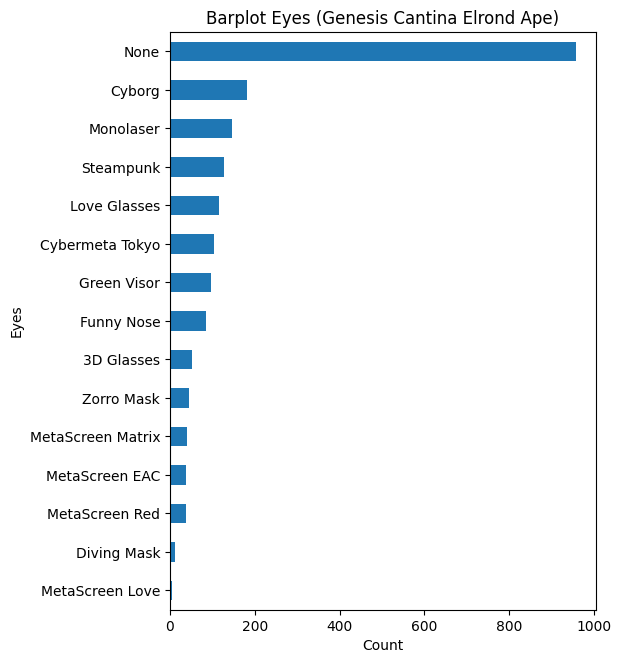

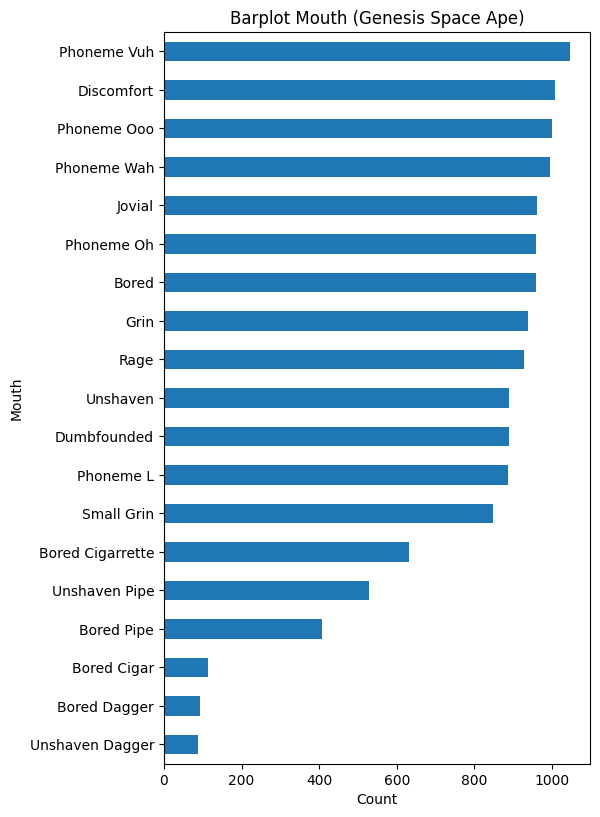

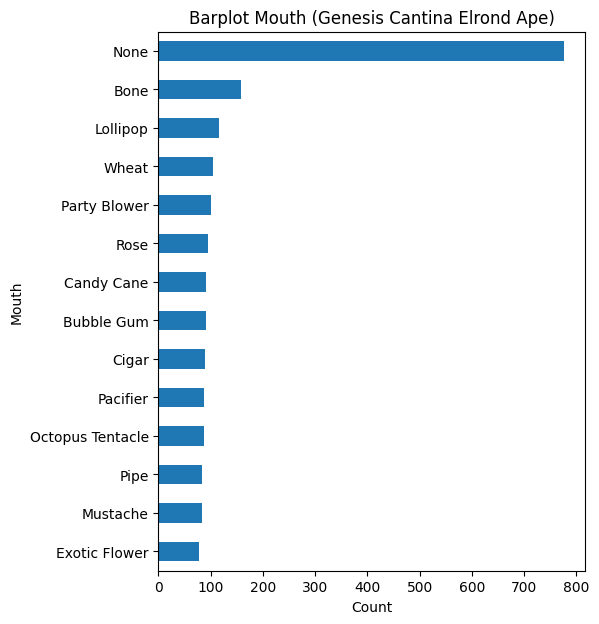

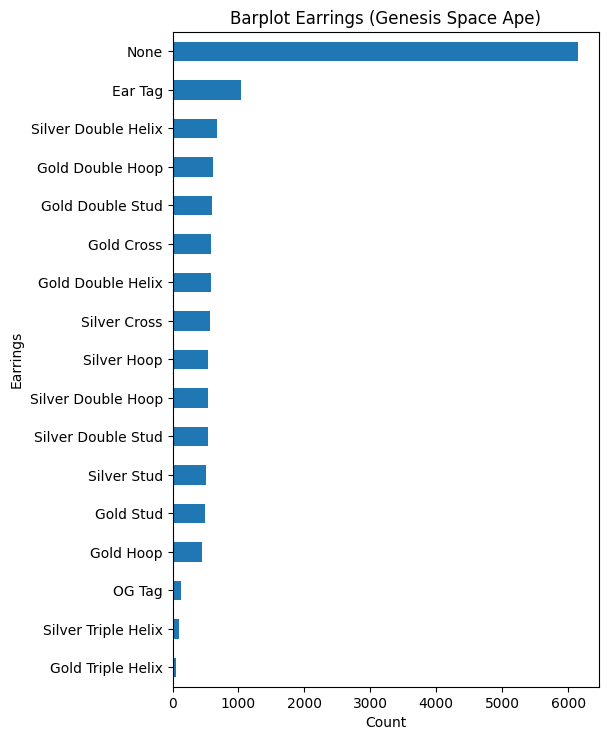

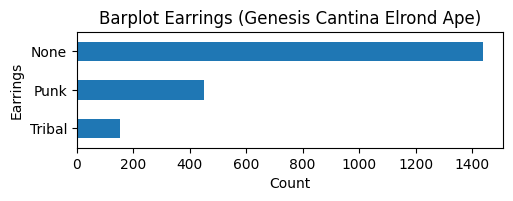

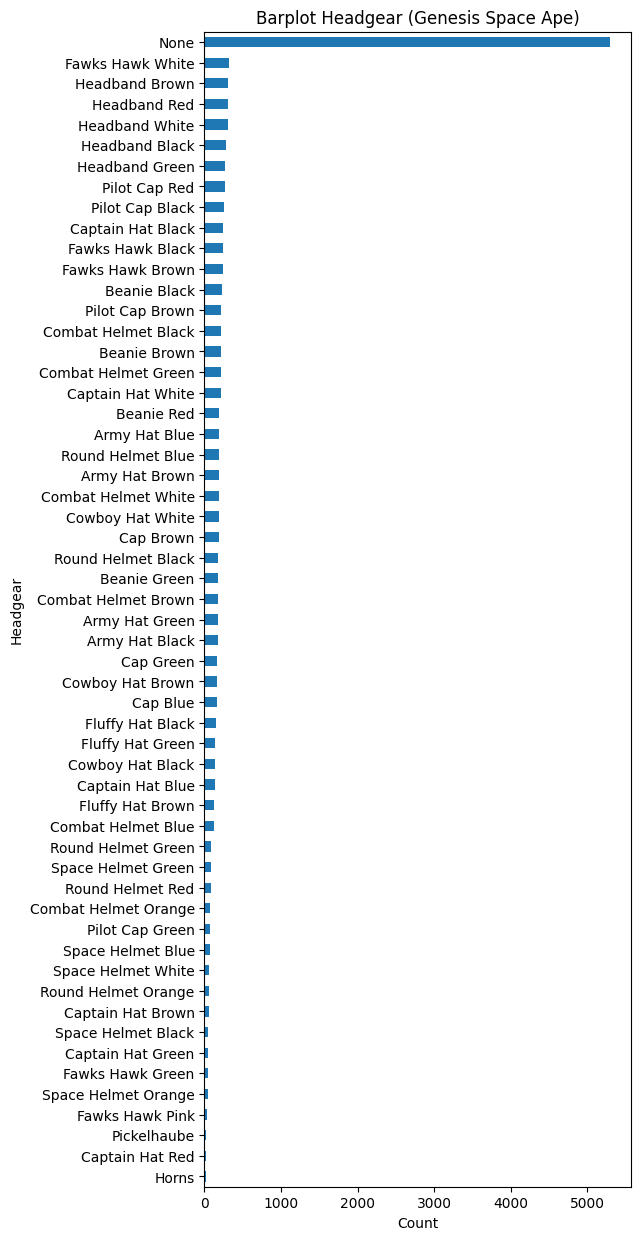

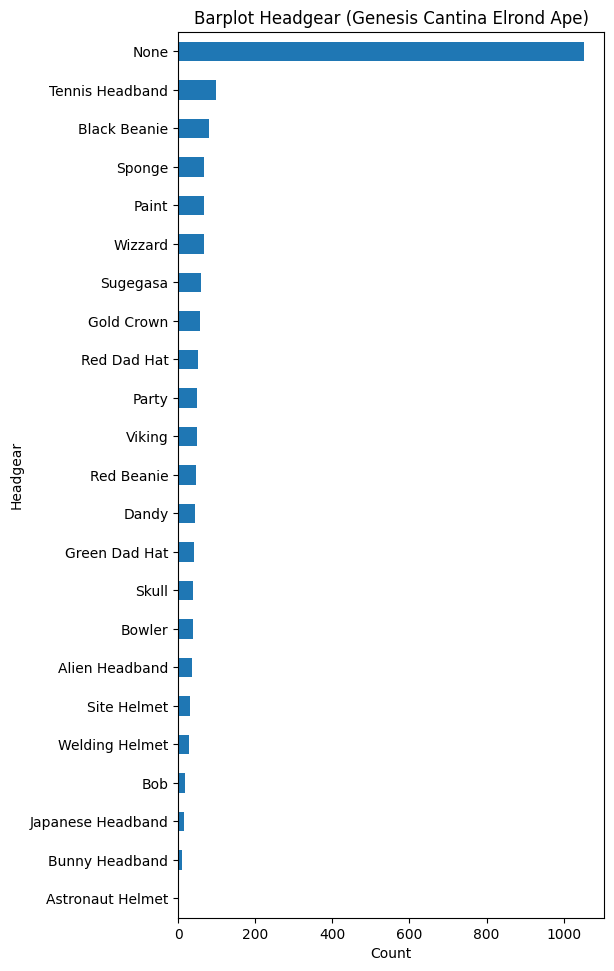

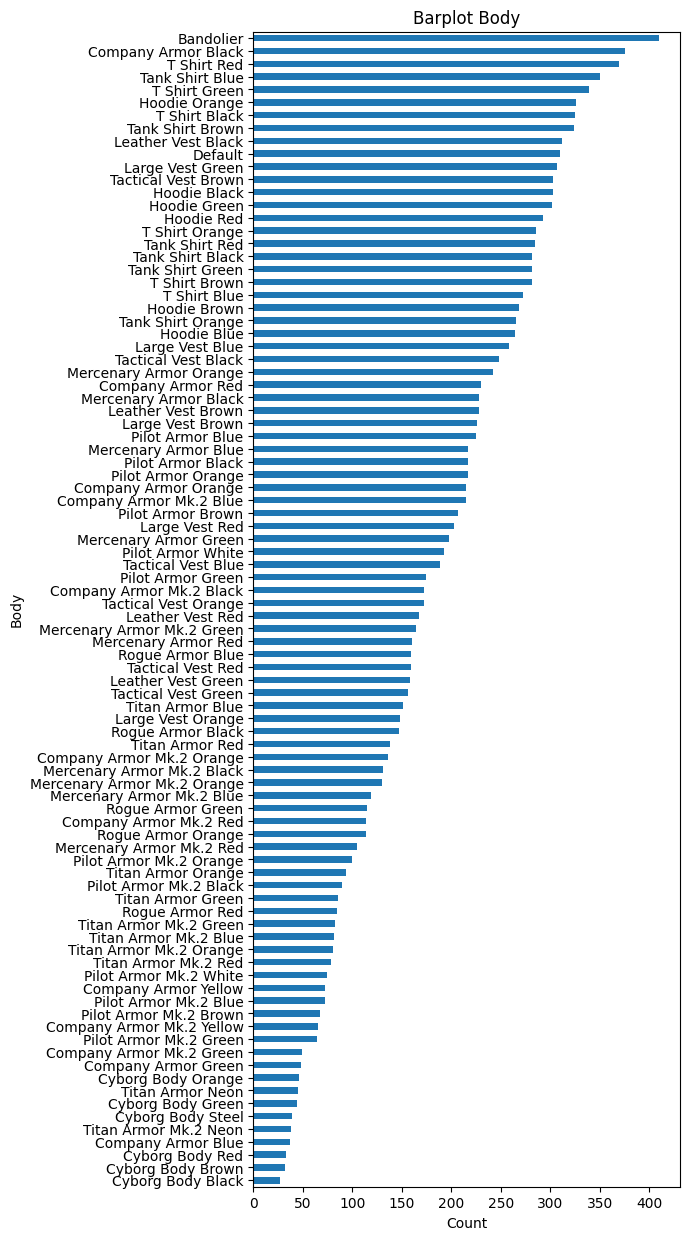

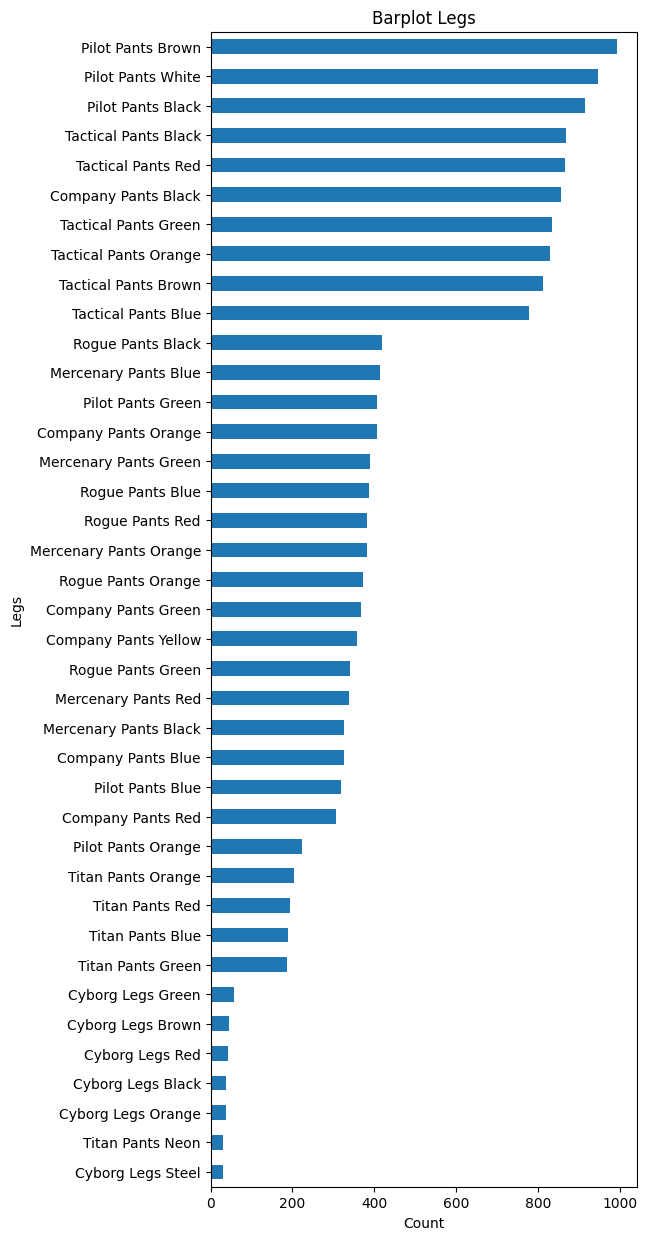

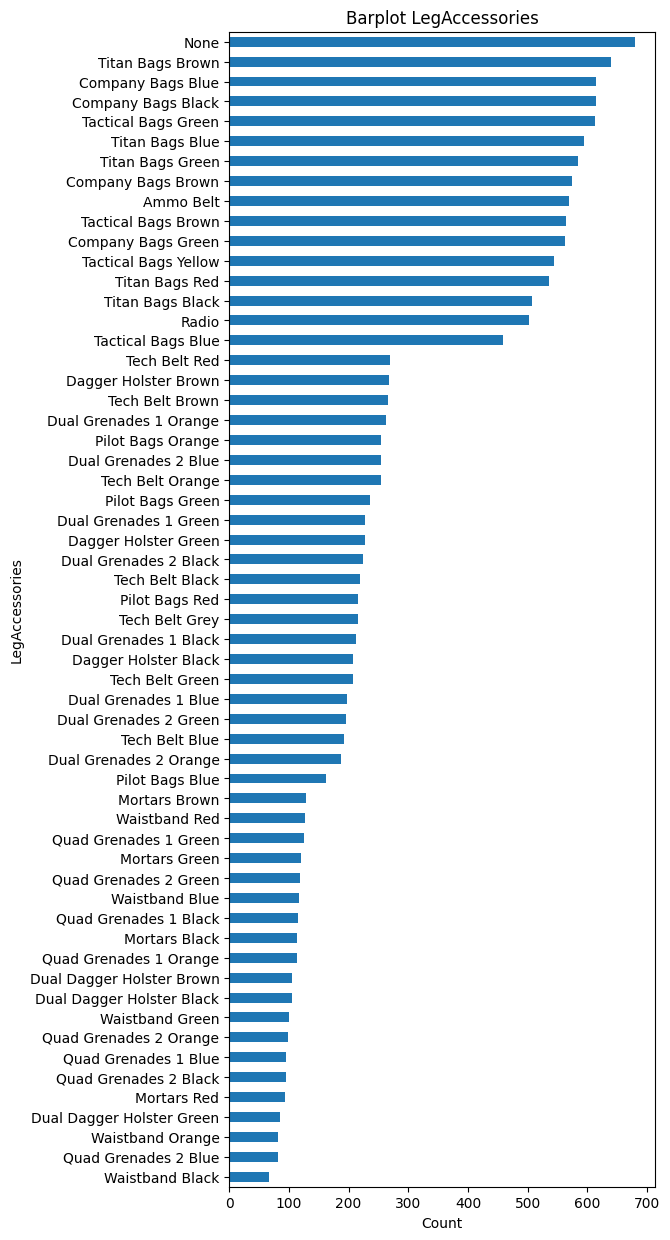

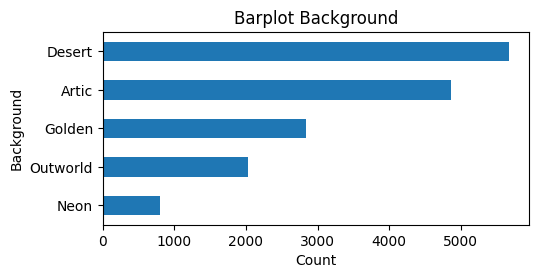

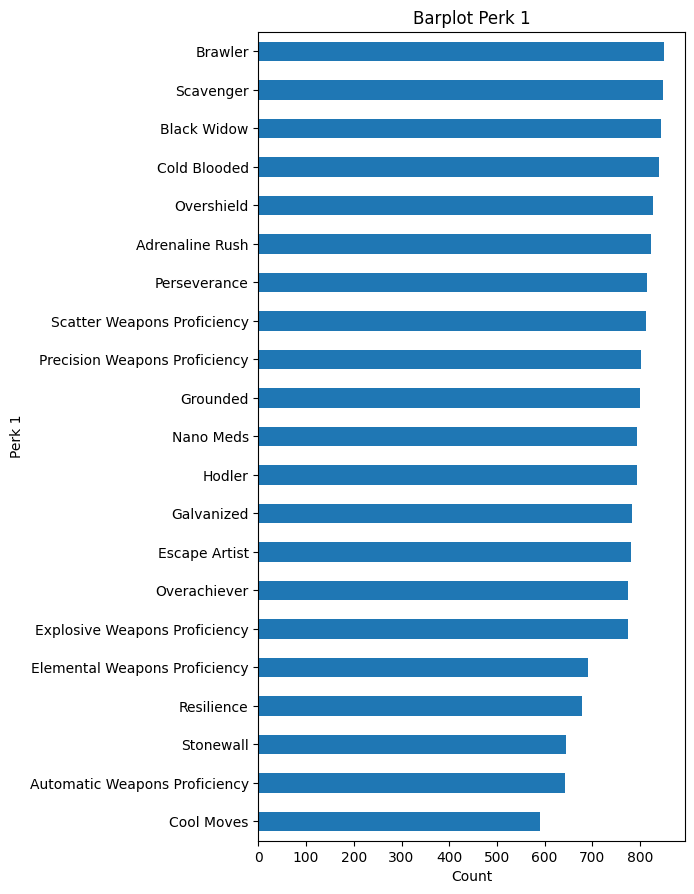

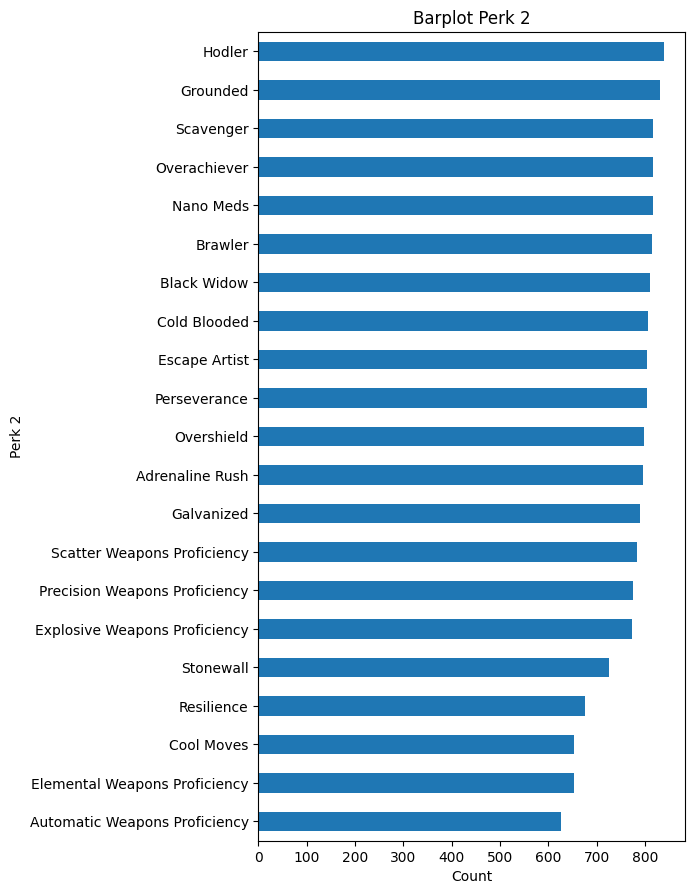

In [10]:
for column in traits:
    if column == 'Species':
        continue
    tmp0 = df[df['Species'] == species[0]][column].fillna('None').unique()
    tmp1 = df[df['Species'] == species[1]][column].fillna('None').unique()
    if set(tmp0) == set(tmp1):
        barh(df.fillna('None').value_counts(column), f'Barplot {column}')
    else:
        barh(df[df['Species']==species[0]].fillna('None').value_counts(column), f'Barplot {column} ({species[0]})')
        barh(df[df['Species']==species[1]].fillna('None').value_counts(column), f'Barplot {column} ({species[1]})')

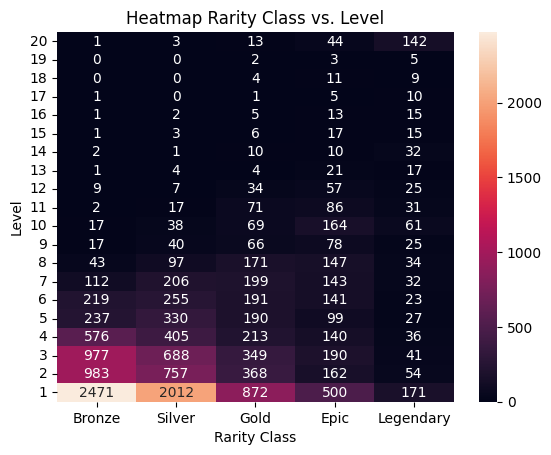

In [11]:
# plot heatmap Rarity Class vs. level on df
# display level ascending and rarity class 'bronze', 'silver', 'gold', 'epic', 'legendary'
# plot also total count of each rarity class
title = 'Heatmap Rarity Class vs. Level'
tmp = df[['Rarity Class', 'level']].copy()
tmp['count'] = 1
tmp = tmp.groupby(['Rarity Class', 'level']).sum().reset_index()
tmp = tmp.pivot(index='level', columns='Rarity Class', values='count')
# reord columns
tmp = tmp.sort_values(by='level', ascending=False)[['Bronze', 'Silver', 'Gold', 'Epic', 'Legendary']]
tmp = tmp.fillna(0)
sns.heatmap(tmp, annot=True, fmt='g')
plt.yticks(rotation=0)
plt.title(title)
plt.xlabel('Rarity Class')
plt.ylabel('Level')
plt.show()

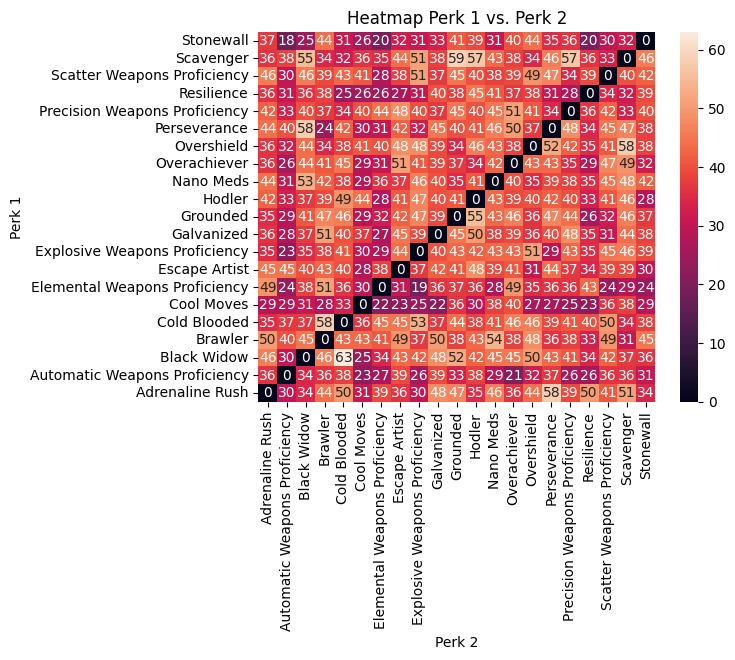

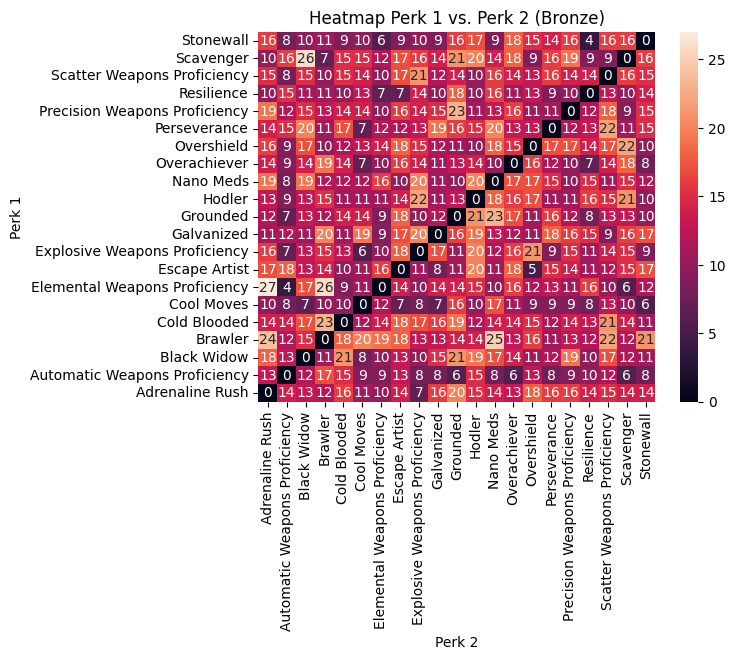

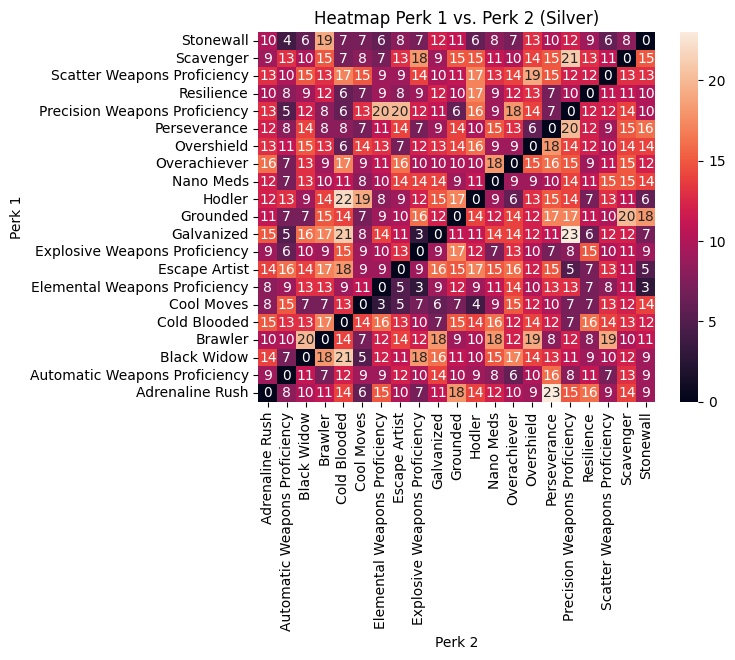

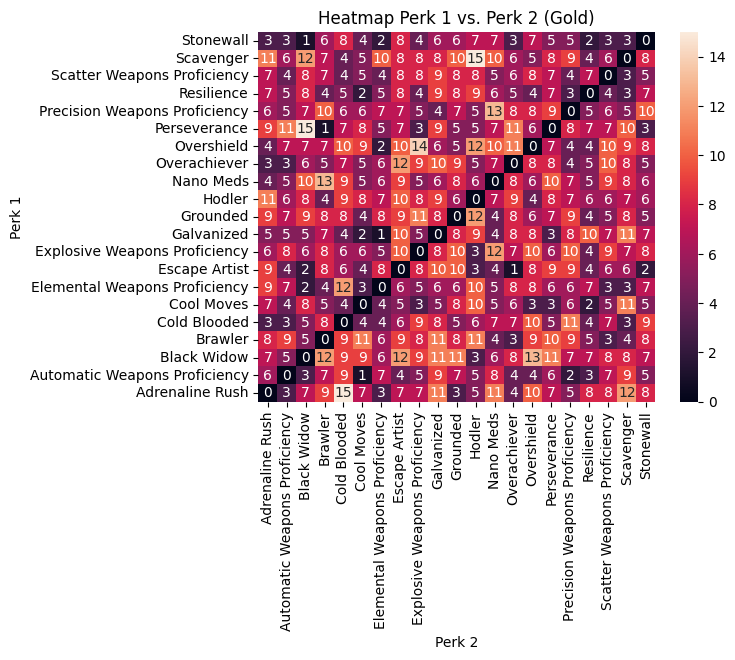

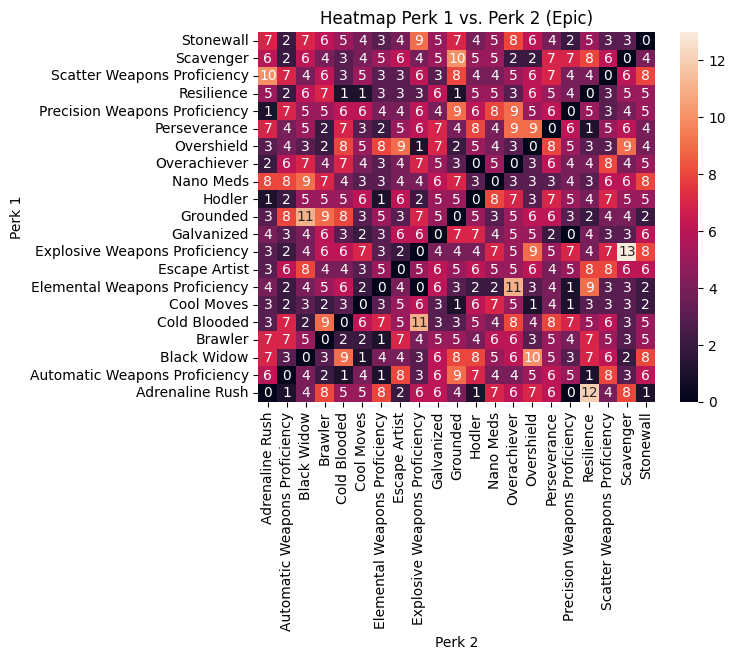

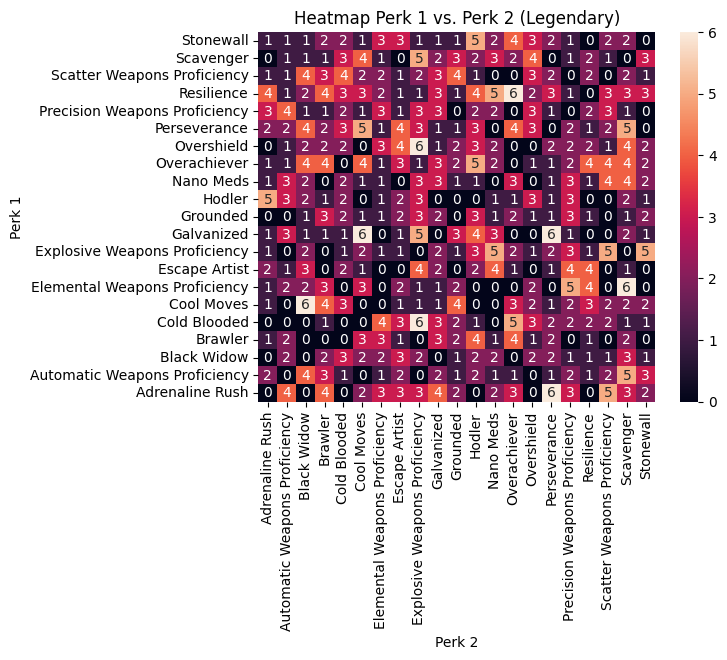

In [12]:
# plot heatmap Perk 1 vs. Perk 2 on df with  mathplotlib
def perks_heatmap(df, title='Heatmap Perk 1 vs. Perk 2'):
    tmp = df[['Perk 1', 'Perk 2']].copy()
    tmp['count'] = 1
    tmp = tmp.groupby(['Perk 1', 'Perk 2']).sum().reset_index()
    tmp = tmp.pivot(index='Perk 1', columns='Perk 2', values='count')
    # reord columns
    tmp = tmp.sort_values(by='Perk 1', ascending=False)
    tmp = tmp.fillna(0)
    sns.heatmap(tmp, annot=True, fmt='g')
    plt.yticks(rotation=0)
    plt.title(title)
    plt.xlabel('Perk 2')
    plt.ylabel('Perk 1')
    plt.show()
perks_heatmap(df)
perks_heatmap(df[df['Rarity Class']=='Bronze'], title='Heatmap Perk 1 vs. Perk 2 (Bronze)')
perks_heatmap(df[df['Rarity Class']=='Silver'], title='Heatmap Perk 1 vs. Perk 2 (Silver)')
perks_heatmap(df[df['Rarity Class']=='Gold'], title='Heatmap Perk 1 vs. Perk 2 (Gold)')
perks_heatmap(df[df['Rarity Class']=='Epic'], title='Heatmap Perk 1 vs. Perk 2 (Epic)')
perks_heatmap(df[df['Rarity Class']=='Legendary'], title='Heatmap Perk 1 vs. Perk 2 (Legendary)')

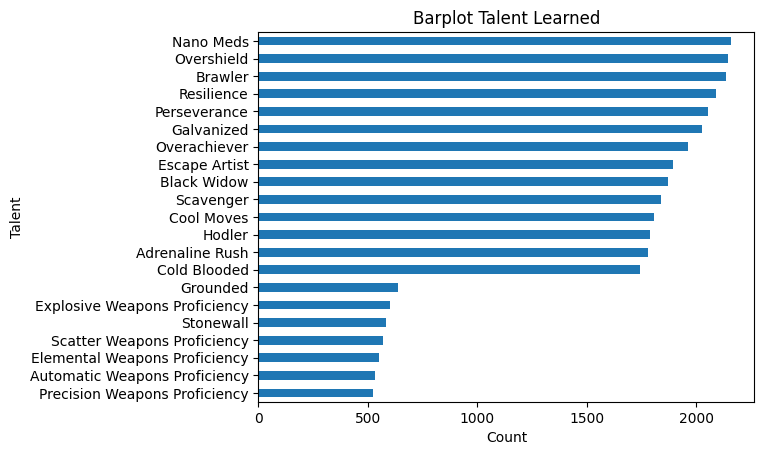

In [13]:
tmp = pd.Series(df[talents].sum()).to_dict()
for k in tmp:
    tmp[k] = tmp[k] - df[df['Perk 1']==k].shape[0]*10 - df[df['Perk 2']==k].shape[0]*10
pd.Series(tmp).sort_values().plot.barh(width=0.5)
plt.xlabel('Count')
plt.title('Barplot Talent Learned')
plt.ylabel('Talent')
plt.show()

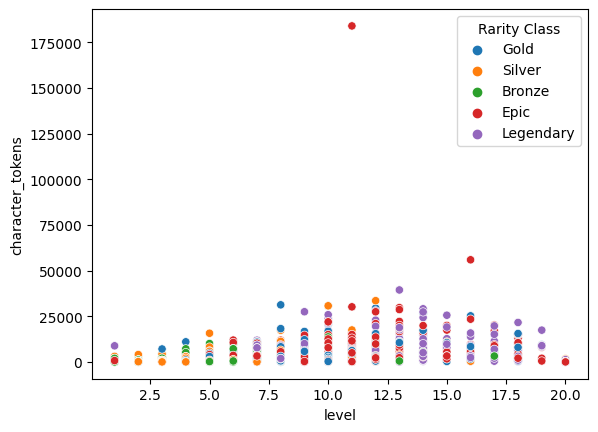

In [14]:
# plot scatterplot character_tokens vs. level on df
from matplotlib import pyplot as plt
import seaborn as sns

sns.scatterplot(data=df, x='level', y='character_tokens', hue='Rarity Class')
plt.show()
# heatmap character_tokens vs. level on df
tmp = df[['character_tokens', 'level']].copy()
tmp['count'] = 1
tmp = tmp.groupby(['character_tokens', 'level']).sum().reset_index()

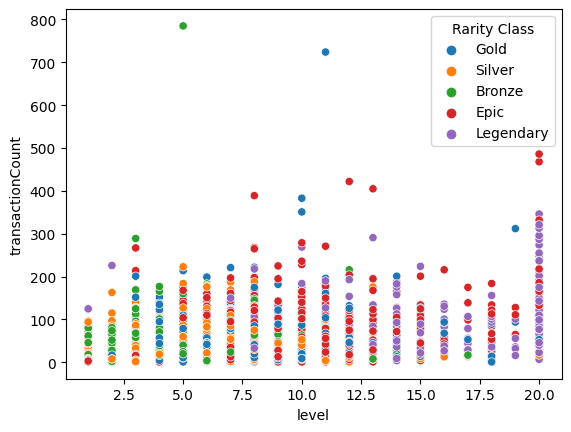

In [15]:
# plort transactionCount vs. level
sns.scatterplot(data=df, x='level', y='transactionCount', hue='Rarity Class')
plt.show()

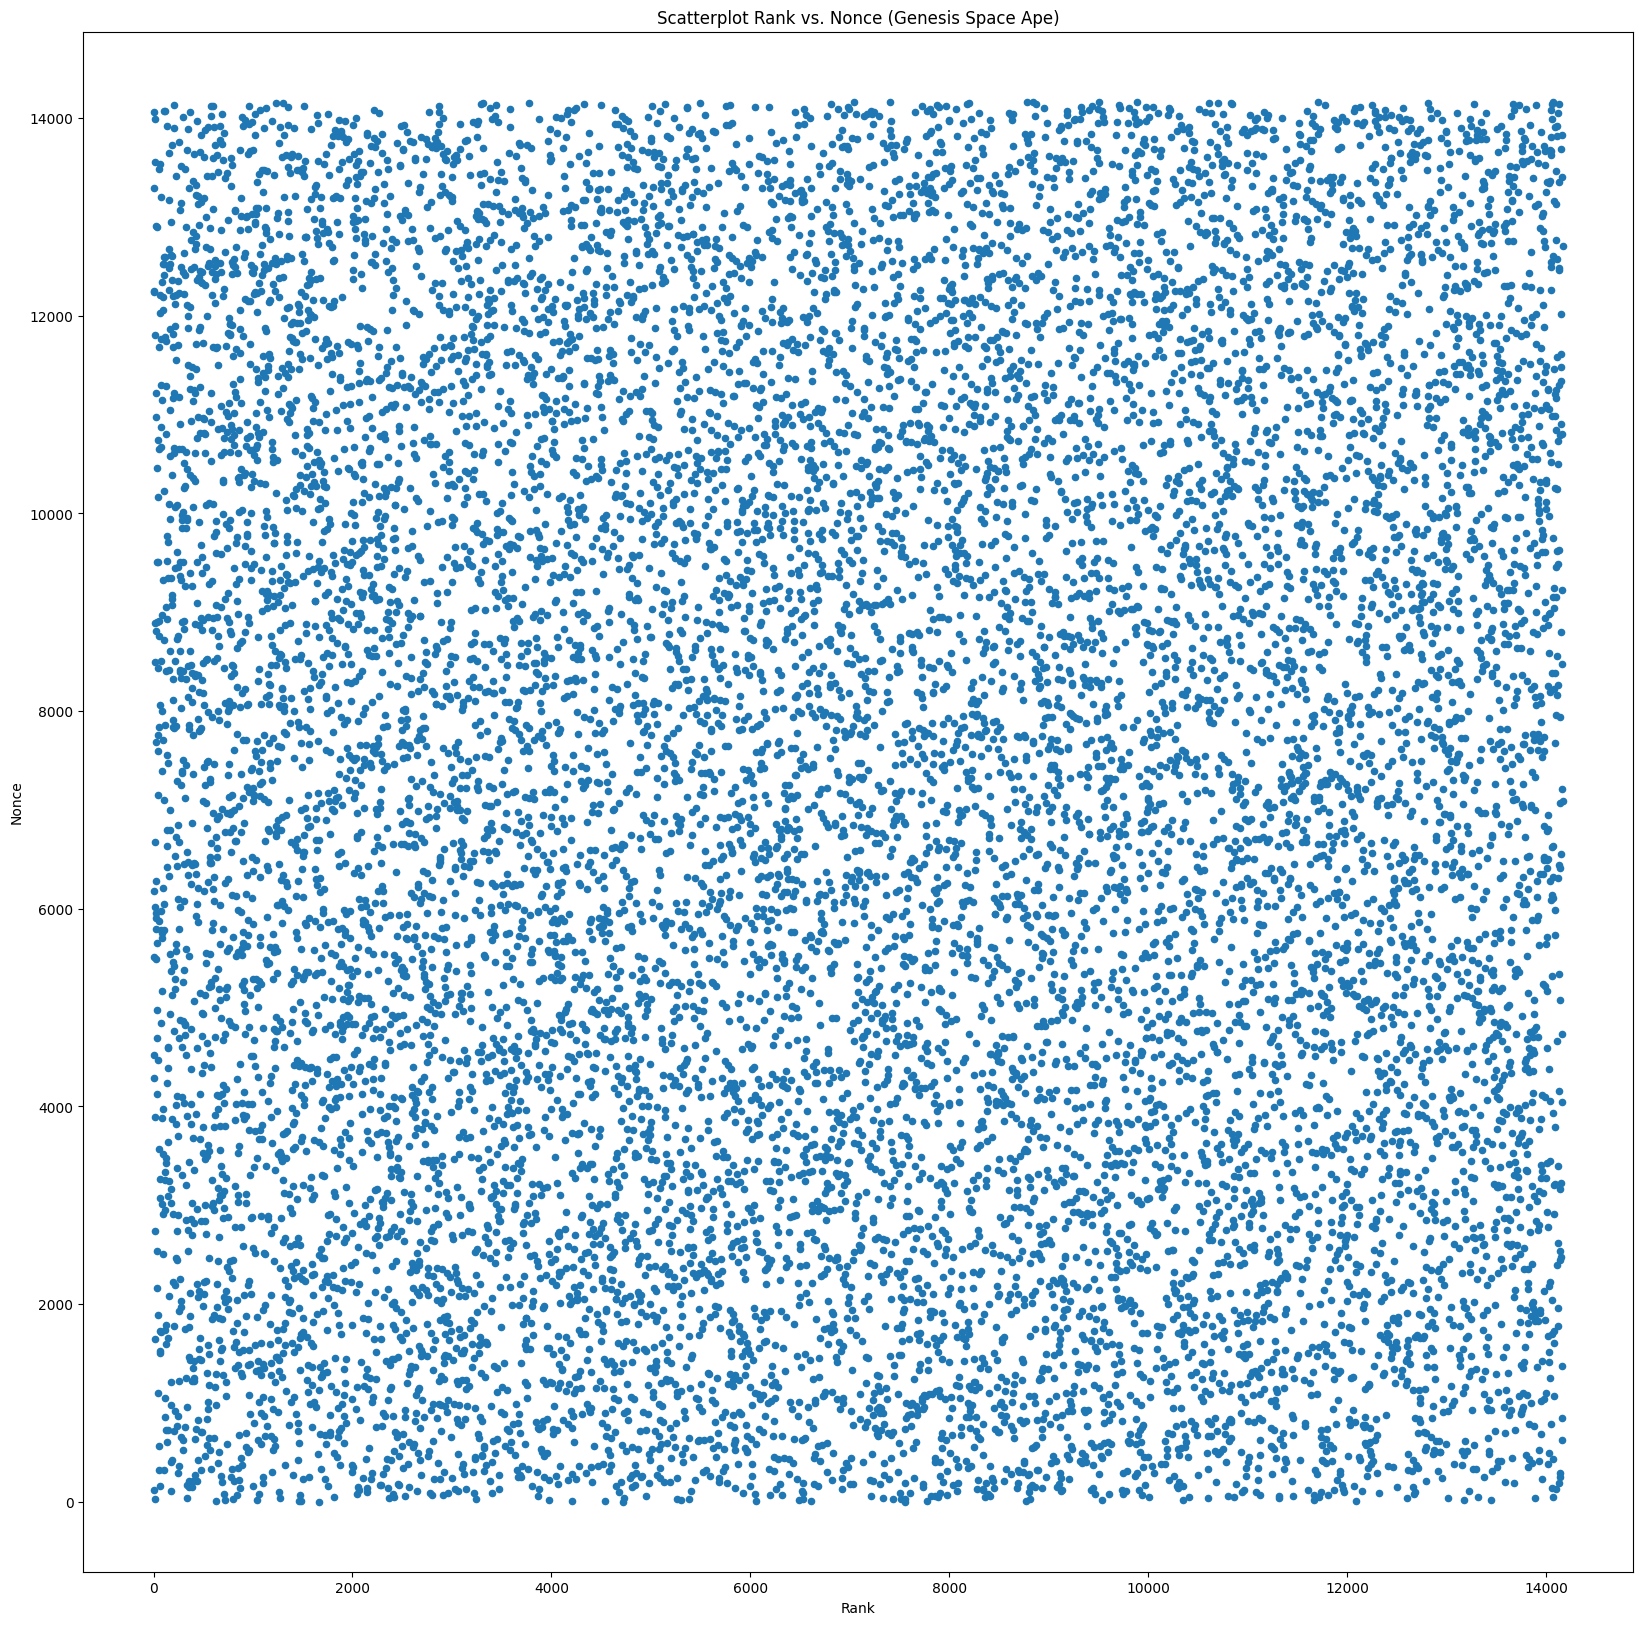

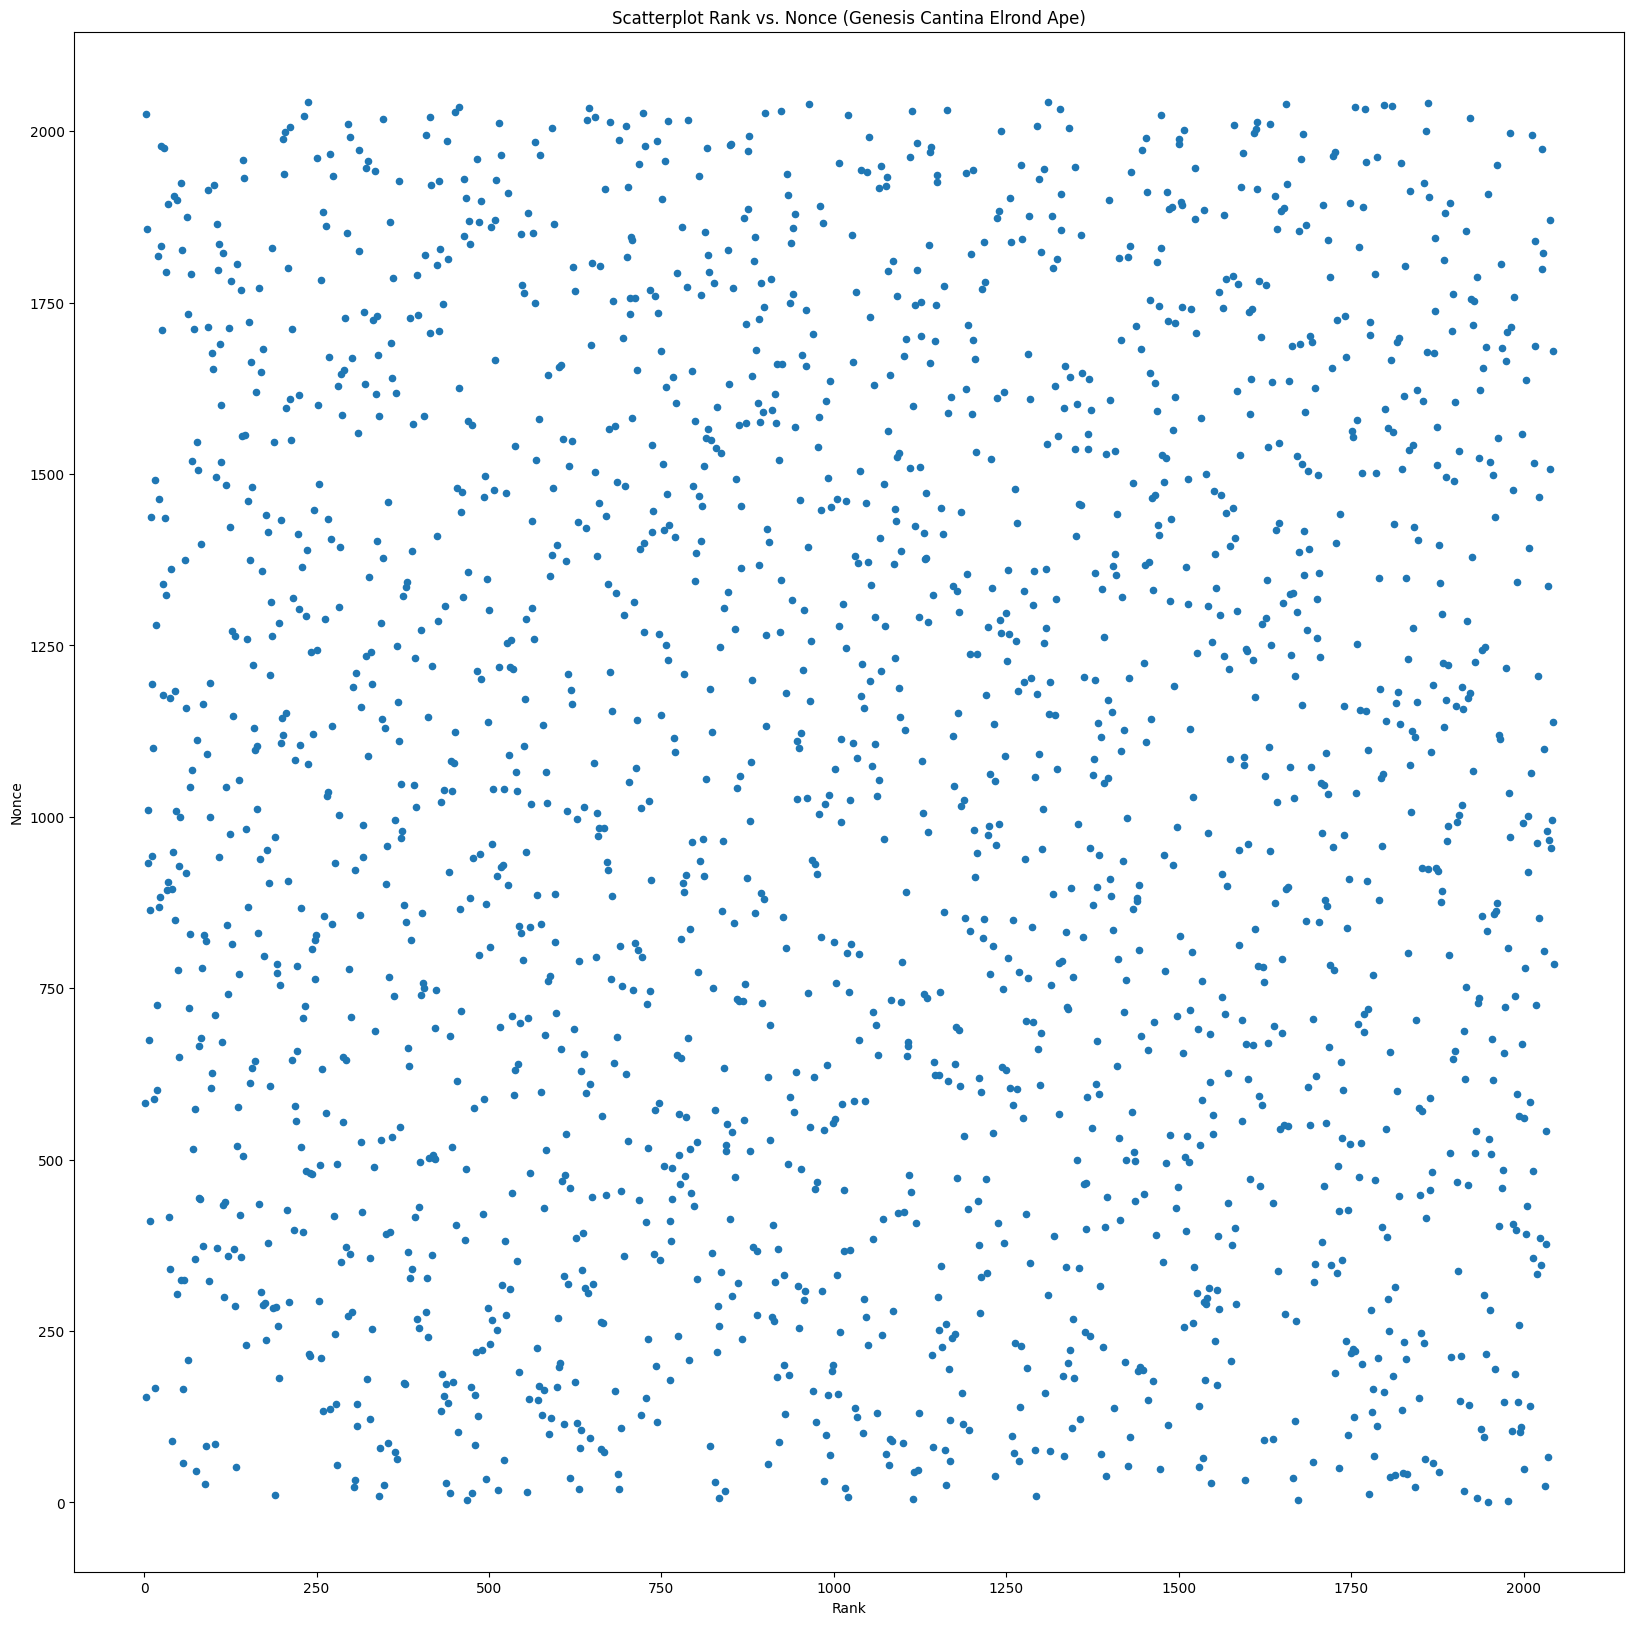

In [16]:
# scatter plot rank vs nonce figure size 40x40
df[df['Species']==species[0]].plot.scatter(x='rank', y='nonce', figsize=(20, 20))
plt.xlabel('Rank')
plt.ylabel('Nonce')
plt.title(f'Scatterplot Rank vs. Nonce ({species[0]})')
plt.show()
df[df['Species']==species[1]].plot.scatter(x='rank', y='nonce', figsize=(20, 20))
plt.xlabel('Rank')
plt.ylabel('Nonce')
plt.title(f'Scatterplot Rank vs. Nonce ({species[1]})')
plt.show()

In [17]:
keys = {}
for nft in transactions:
    for transaction in transactions[nft]['transactions']:
        for key in transaction:
            if key not in keys:
                keys[key] = 0
            keys[key] += 1
keys

{'txHash': 326669,
 'receiver': 326669,
 'receiverAssets': 187045,
 'receiverShard': 326669,
 'sender': 326669,
 'senderShard': 326669,
 'status': 326669,
 'value': 326669,
 'timestamp': 326669,
 'data': 326669,
 'function': 326669,
 'action': 326669,
 'type': 326669,
 'originalTxHash': 193350,
 'gasLimit': 133319,
 'gasPrice': 133319,
 'gasUsed': 133319,
 'miniBlockHash': 278803,
 'nonce': 133319,
 'round': 133319,
 'signature': 133319,
 'fee': 133319,
 'senderBlockHash': 278803,
 'senderBlockNonce': 278803,
 'receiverBlockHash': 278803,
 'receiverBlockNonce': 278803,
 'senderAssets': 171445,
 'guardianSignature': 651,
 'isRelayed': 91,
 'scamInfo': 5}

In [18]:
result = {}
for identifier in transactions:
    result[identifier] = []
    for transaction in transactions[identifier]['transactions']:
        d = {
            'txHash': transaction['txHash'],
            'timestamp': transaction['timestamp'],
            'sender': transaction['sender'],
            'function': transaction['function'],
            'value': transaction['value'],
            'type': transaction['type'],
            'category': transaction['action']['category'],
            'name': transaction['action']['name'],
            'receiver': transaction['action']['arguments']['receiver']
        }
        result[identifier].append(d)
    result[identifier] = sorted(result[identifier], key=lambda x: x['timestamp'])

In [19]:
holder = {}
for identifier in result:
    holder[identifier] = []
    for index, transaction in enumerate(result[identifier]):
        if index == 0 and transaction['sender'] != transaction['receiver']:
            holder[identifier].append(transaction['sender'])
            holder[identifier].append(transaction['receiver'])
        elif transaction['sender'] == holder[identifier][-1] and transaction['sender'] != transaction['receiver']:
            holder[identifier].append(transaction['receiver'])

In [20]:
contracts = {}
for identifier in holder:
    for index, address in enumerate(holder[identifier]):
        if address.startswith('erd1qqqqqqqqqqqqqpgq'):
            if address not in contracts:
                contracts[address] = 1
            else:
                contracts[address] += 1
pd.DataFrame.from_dict(contracts, orient='index', columns=['count']).sort_values(by='count', ascending=False).reset_index().rename(columns={'index': 'address'})

,address,count
0,erd1qqqqqqqqqqqqqpgq0rkx70tmr3myr9uada9wez4kky...,57908
1,erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpq...,39901
2,erd1qqqqqqqqqqqqqpgq9t4l4rm2fr9h4fv05u2ld5eh99...,14162
3,erd1qqqqqqqqqqqqqpgq8xwzu82v8ex3h4ayl5lsvxqxnh...,4378
4,erd1qqqqqqqqqqqqqpgqd9rvv2n378e27jcts8vfwynpx0...,2144
5,erd1qqqqqqqqqqqqqpgqmrzzclpr9qpzh6rz3l75q7mtnz...,2030
6,erd1qqqqqqqqqqqqqpgq705fxpfrjne0tl3ece0rrspykq...,1239
7,erd1qqqqqqqqqqqqqpgq47y8hnct68v6asjv6gxem6h9ru...,732
8,erd1qqqqqqqqqqqqqpgqhpauarfmx75nf4pwxh2fuy520y...,433
9,erd1qqqqqqqqqqqqqpgqehfk86s8l949whpm7w80zp9j28...,390


In [21]:
EOA_holders = {}
for identifier in holder:
    EOA_holders[identifier] = set()
    for index, address in enumerate(holder[identifier]):
        if not address.startswith('erd1qqqqqqqqqqqqqpgq'):
            EOA_holders[identifier].add(address)

In [22]:
pd.DataFrame.from_dict({k : len(v) for k, v in EOA_holders.items()}, orient='index', columns=['holderCount']).sort_values(by='holderCount', ascending=False).reset_index().rename(columns={'index': 'identifier'}).value_counts('holderCount')

holderCount
1     6935
2     3748
3     2065
4     1368
5      901
6      515
7      296
8      164
9       98
10      51
11      34
12      15
13       7
14       5
15       2
19       2
16       1
17       1
18       1
Name: count, dtype: int64